In [3]:
!pip install caer canaro

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.5/809.5 kB 948.2 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 13.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 14.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 17.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 15.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.3.0
    Uninstalling typing_extensions-4.3.0:
      Successfully uninstalled typing_extensions-4.3.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.7.0
    Uninstalling h5py-3.7.0:
      Successfully uninstalled h5py-3.7.0
  Attempting uninstall: tensorboard
    Found existing ins

In [4]:
import caer
import os
import canaro
import numpy as np
import cv2 as cv
import gc

In [5]:
IMG_SIZE=(80,80)
channels=1
char_path=r'../input/the-simpsons-characters-dataset/simpsons_dataset'

In [6]:
char_dict={}
for char in os.listdir(char_path):
    char_dict[char]=len(os.listdir(os.path.join(char_path,char)))

#sort in descending order
char_dict=caer.sort_dict(char_dict,descending=True)
char_dict
    

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [7]:
characters=[]
count=0
for i in char_dict:
    characters.append(i[0])
    count+=1
    if count>=10:
        break
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [8]:
#create the training data
train=caer.preprocess_from_dir(char_path,characters,channels=channels,IMG_SIZE=IMG_SIZE,isShuffle=True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 21.800513744354248s
[INFO] At 1000 files
[INFO] 1454 files found in 7.575841903686523s
[INFO] At 1000 files
[INFO] 1452 files found in 7.332622051239014s
[INFO] At 1000 files
[INFO] 1354 files found in 4.147351026535034s
[INFO] At 1000 files
[INFO] 1342 files found in 5.365178108215332s
[INFO] At 1000 files
[INFO] 1291 files found in 2.9275412559509277s
[INFO] At 1000 files
[INFO] 1206 files found in 0.9352455139160156s
[INFO] At 1000 files
[INFO] 1194 files found in 1.3951714038848877s
[INFO] At 1000 files
[INFO] 1193 files found in 1.1783373355865479s
[INFO] At 1000 files
[INFO] 1079 files found in 0.003551959991455078s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 3m 8s


In [9]:
len(train)

13811

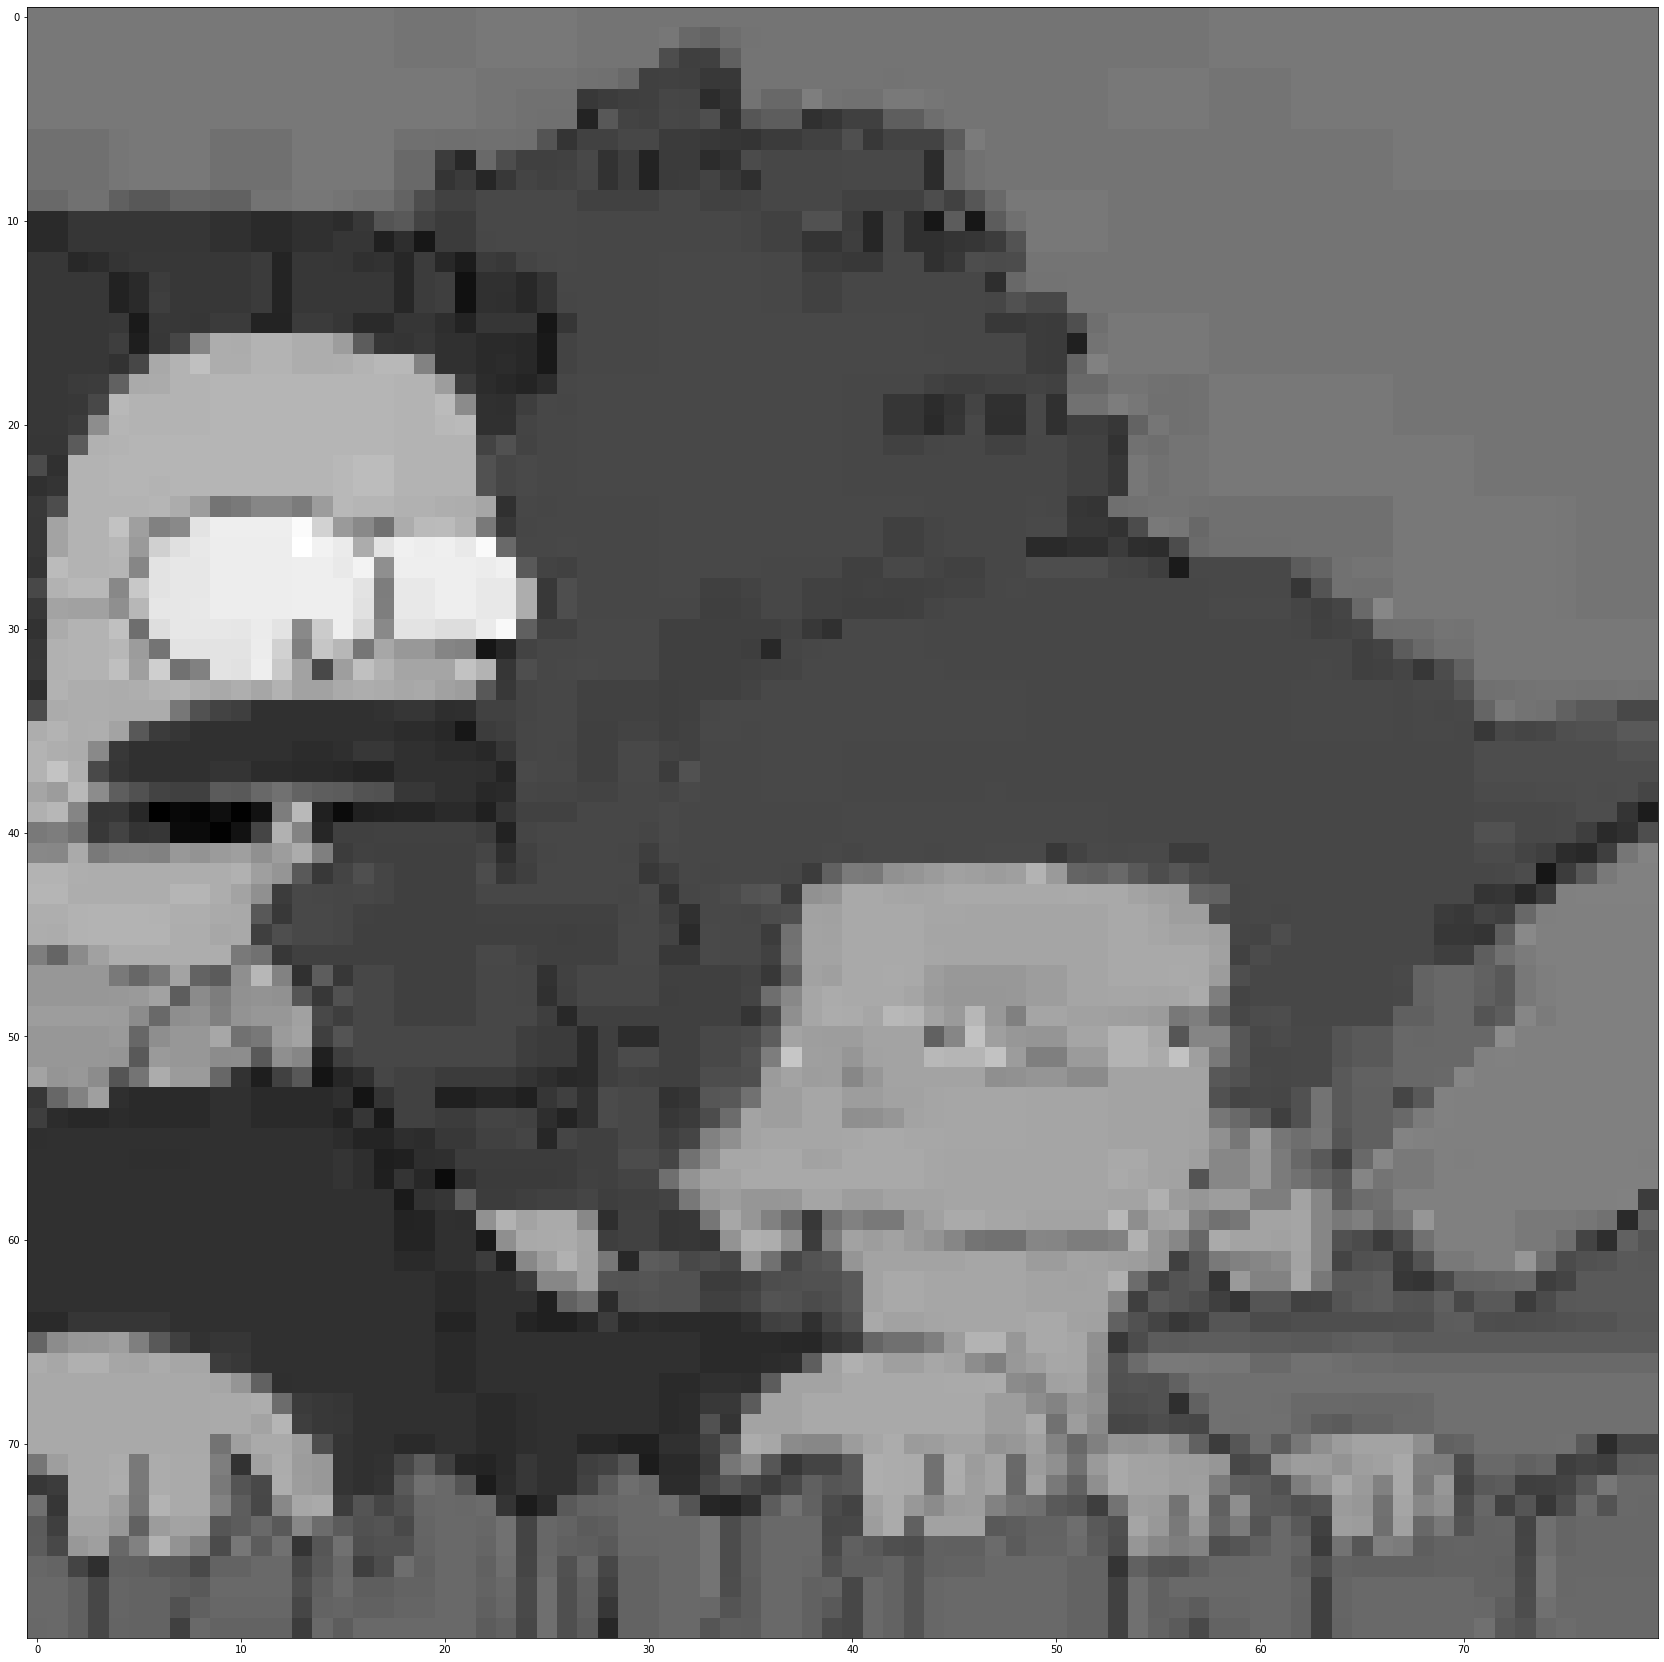

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plt.imshow(train[0][0], cmap='gray')
plt.show()

In [11]:
featureSet,labels=caer.sep_train(train,IMG_SIZE=IMG_SIZE)

In [12]:
from tensorflow.keras.utils import to_categorical
#normalize featureSet ==>(0,1)
featureSet= caer.normalize(featureSet)
labels= to_categorical(labels,len(characters))

In [13]:
x_train,x_val,y_train,y_val=caer.train_val_split(featureSet,labels,val_ratio=.2)

In [14]:
del train
del featureSet
del labels
gc.collect()

23

In [15]:
BATCH_SIZE=32
EPOCHS=10

In [16]:
#Image data generator
datagen=canaro.generators.imageDataGenerator()
train_gen=datagen.flow(x_train,y_train,batch_size=BATCH_SIZE)

In [17]:
#creating the model
model=canaro.models.createSimpsonsModel(IMG_SIZE=IMG_SIZE,channels=channels,output_dim=len(characters),
                                       loss='binary_crossentropy',decay=1e-6, learning_rate=0.001,momentum=0.9,
                                       nesterov=True)


/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 80, 80, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 78, 78, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 39, 39, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 18, 18, 64)       

In [19]:
from tensorflow.keras.callbacks import LearningRateScheduler

In [20]:
callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]


In [21]:
training = model.fit(train_gen,
                    steps_per_epoch=len(x_train)//BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_val,y_val),
                    validation_steps=len(y_val)//BATCH_SIZE,
                    callbacks = callbacks_list)

Epoch 1/10
345/345 [==============================] - 17s 28ms/step - loss: 0.3436 - accuracy: 0.1498 - val_loss: 0.3313 - val_accuracy: 0.1632
Epoch 2/10
345/345 [==============================] - 9s 27ms/step - loss: 0.3239 - accuracy: 0.1610
Epoch 3/10
345/345 [==============================] - 9s 26ms/step - loss: 0.3236 - accuracy: 0.1615
Epoch 4/10
345/345 [==============================] - 9s 25ms/step - loss: 0.3229 - accuracy: 0.1614
Epoch 5/10
345/345 [==============================] - 9s 25ms/step - loss: 0.3203 - accuracy: 0.1660
Epoch 6/10
345/345 [==============================] - 8s 24ms/step - loss: 0.3098 - accuracy: 0.2197
Epoch 7/10
345/345 [==============================] - 8s 24ms/step - loss: 0.3052 - accuracy: 0.2359
Epoch 8/10
345/345 [==============================] - 8s 25ms/step - loss: 0.3027 - accuracy: 0.2502
Epoch 9/10
345/345 [==============================] - 9s 25ms/step - loss: 0.2998 - accuracy: 0.2633
Epoch 10/10
345/345 [===========================

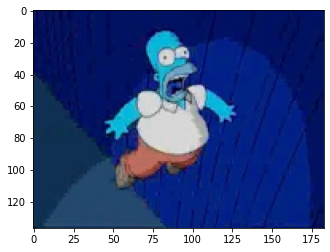

In [22]:
test_path = r'../input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/bart_simpson_15.jpg'

img = cv.imread(test_path)

plt.imshow(img)
plt.show()

In [23]:
def prepare(image):
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = cv.resize(image, IMG_SIZE)
    image = caer.reshape(image, IMG_SIZE, 1)
    return image

In [24]:
predictions = model.predict(prepare(img))

In [25]:
# Getting class with the highest probability
print(characters[np.argmax(predictions[0])])

lisa_simpson
